In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/US-shooting-incidents.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4999 non-null   int64  
 1   person       4999 non-null   object 
 2   dept         4999 non-null   object 
 3   eow          4999 non-null   object 
 4   cause        4999 non-null   object 
 5   cause_short  4999 non-null   object 
 6   date         4999 non-null   object 
 7   year         4999 non-null   int64  
 8   canine       4999 non-null   bool   
 9   dept_name    4999 non-null   object 
 10  state        4999 non-null   object 
 11  description  4999 non-null   object 
 12  latitude     4999 non-null   float64
 13  longitude    4999 non-null   float64
 14  state_name   4999 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 551.8+ KB


In [ ]:
data.head(10)

,Unnamed: 0,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state,description,latitude,longitude,state_name
0,1,K9 Roscoe,"Phoenix Police Department, AZ","EOW: Friday, July 13, 1984",Cause of Death: Struck by vehicle,Struck by vehicle,1984-07-13,1984,True,Phoenix Police Department,AZ,Phoenix,33.448143,-112.096962,Arizona
1,2,"Police Officer Roy L. Leon, Jr.","Cotton Plant Police Department, AR","EOW: Friday, July 13, 1984",Cause of Death: Gunfire,Gunfire,1984-07-13,1984,False,Cotton Plant Police Department,AR,Little Rock,34.746613,-92.288986,Arkansas
2,3,Officer Stanley D. Pounds,"Portland Police Bureau, OR","EOW: Wednesday, July 18, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-18,1984,False,Portland Police Bureau,OR,Salem,44.938461,-123.030403,Oregon
3,4,"Enforcement Agent Ernest Joseph Gray, Jr.","Pennsylvania Public Utility Commission, PA","EOW: Friday, July 20, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-20,1984,False,Pennsylvania Public Utility Commission,PA,Harrisburg,40.264378,-76.883598,Pennsylvania
4,5,"Police Officer James W. Carozza, Jr.","Greenburgh Police Department, NY","EOW: Friday, July 20, 1984",Cause of Death: Vehicle pursuit,Vehicle pursuit,1984-07-20,1984,False,Greenburgh Police Department,NY,Albany,42.652843,-73.757874,New York
5,6,Patrolman Cleo J. Sheely,"Newton Falls Police Department, OH","EOW: Saturday, July 21, 1984",Cause of Death: Heart attack,Heart attack,1984-07-21,1984,False,Newton Falls Police Department,OH,Columbus,39.961346,-82.999069,Ohio
6,7,Deputy Sheriff Thomas E. Bryant,"Wood County Sheriff's Office, OH","EOW: Monday, July 23, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-23,1984,False,Wood County Sheriff's Office,OH,Columbus,39.961346,-82.999069,Ohio
7,8,Reserve Officer James Charles Taylor,"Dallas Police Department, TX","EOW: Tuesday, July 24, 1984",Cause of Death: Aircraft accident,Aircraft accident,1984-07-24,1984,False,Dallas Police Department,TX,Austin,30.274670,-97.740349,Texas
8,9,Lieutenant Robert L. Cormier,"Dallas Police Department, TX","EOW: Tuesday, July 24, 1984",Cause of Death: Aircraft accident,Aircraft accident,1984-07-24,1984,False,Dallas Police Department,TX,Austin,30.274670,-97.740349,Texas
9,10,Sergeant Ruben Almanza,"Corpus Christi Police Department, TX","EOW: Friday, July 27, 1984",Cause of Death: Gunfire,Gunfire,1984-07-27,1984,False,Corpus Christi Police Department,TX,Austin,30.274670,-97.740349,Texas


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
person,0
dept,0
eow,0
cause,0
cause_short,0
date,0
year,0
canine,0
dept_name,0


In [ ]:
data = data.rename(columns={'Unnamed: 0': 'Index'})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        4999 non-null   int64  
 1   person       4999 non-null   object 
 2   dept         4999 non-null   object 
 3   eow          4999 non-null   object 
 4   cause        4999 non-null   object 
 5   cause_short  4999 non-null   object 
 6   date         4999 non-null   object 
 7   year         4999 non-null   int64  
 8   canine       4999 non-null   bool   
 9   dept_name    4999 non-null   object 
 10  state        4999 non-null   object 
 11  description  4999 non-null   object 
 12  latitude     4999 non-null   float64
 13  longitude    4999 non-null   float64
 14  state_name   4999 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 551.8+ KB


In [ ]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
print("Numerical features:", numerical_features)

categorical_features = data.select_dtypes(include='object').columns.tolist()
print("Categorical features:", categorical_features)

#Univariate analysis for numerical features
for col in numerical_features:
  print(f"Univariate analysis for {col}:")
  print(data[col].describe())
  print("-"*30)

#Univariate analysis for categorical features
for col in categorical_features:
    print(f"Univariate analysis for {col}:")
    print(data[col].value_counts(normalize=True) * 100)
    print("-" * 30)


Numerical features: ['Index', 'year', 'latitude', 'longitude', 'day', 'month']
Categorical features: ['person', 'dept', 'eow', 'cause', 'cause_short', 'dept_name', 'state', 'description', 'state_name']
Univariate analysis for Index:
count    4999.000000
mean     2500.000000
std      1443.231328
min         1.000000
25%      1250.500000
50%      2500.000000
75%      3749.500000
max      4999.000000
Name: Index, dtype: float64
------------------------------
Univariate analysis for year:
count    4999.000000
mean     1999.779556
std         9.193151
min      1984.000000
25%      1992.000000
50%      2000.000000
75%      2008.000000
max      2016.000000
Name: year, dtype: float64
------------------------------
Univariate analysis for latitude:
count    4999.000000
mean       37.175279
std         4.934604
min        21.307442
25%        33.448143
50%        38.576668
75%        40.220596
max        58.301598
Name: latitude, dtype: float64
------------------------------
Univariate analysis 

### KNN Imputation (for complex patterns)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
data[['latitude', 'longitude']] = knn_imputer.fit_transform(data[['latitude', 'longitude']])

In [ ]:
data['cause_short'].value_counts()

,count
cause_short,
Gunfire,1768
Automobile accident,936
Heart attack,388
Vehicular assault,366
Struck by vehicle,285
Vehicle pursuit,169
Motorcycle accident,163
Aircraft accident,125
Gunfire (Accidental),110


In [ ]:
cause_counts = data['cause_short'].value_counts()
total_events = len(data)
cause_percentages = (cause_counts / total_events) * 100
cause_percentages


,count
cause_short,
Gunfire,35.367073
Automobile accident,18.723745
Heart attack,7.761552
Vehicular assault,7.321464
Struck by vehicle,5.701140
Vehicle pursuit,3.380676
Motorcycle accident,3.260652
Aircraft accident,2.500500
Gunfire (Accidental),2.200440


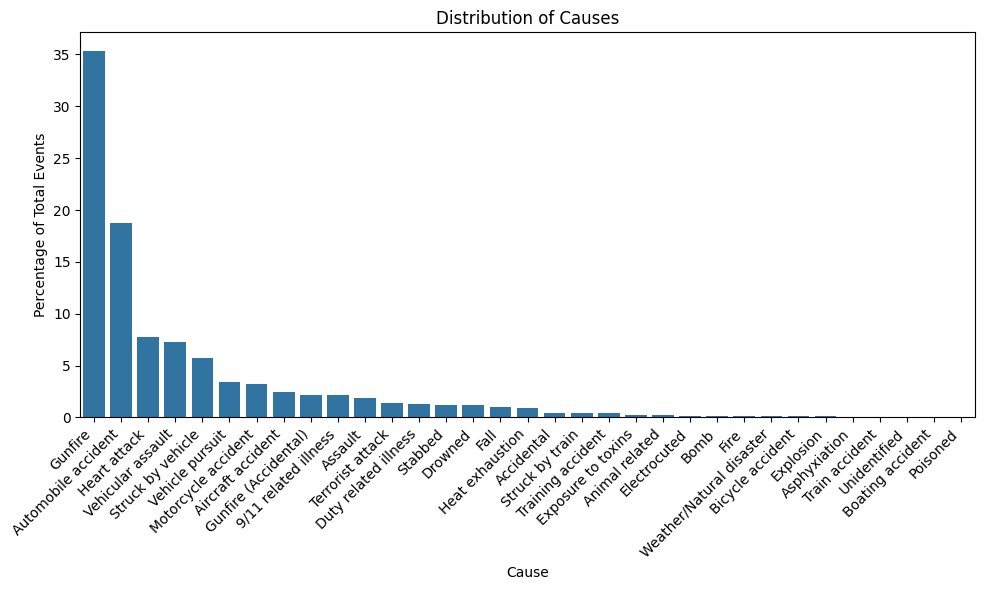

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_percentages.index, y=cause_percentages.values)
plt.xlabel("Cause")
plt.ylabel("Percentage of Total Events")
plt.title("Distribution of Causes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


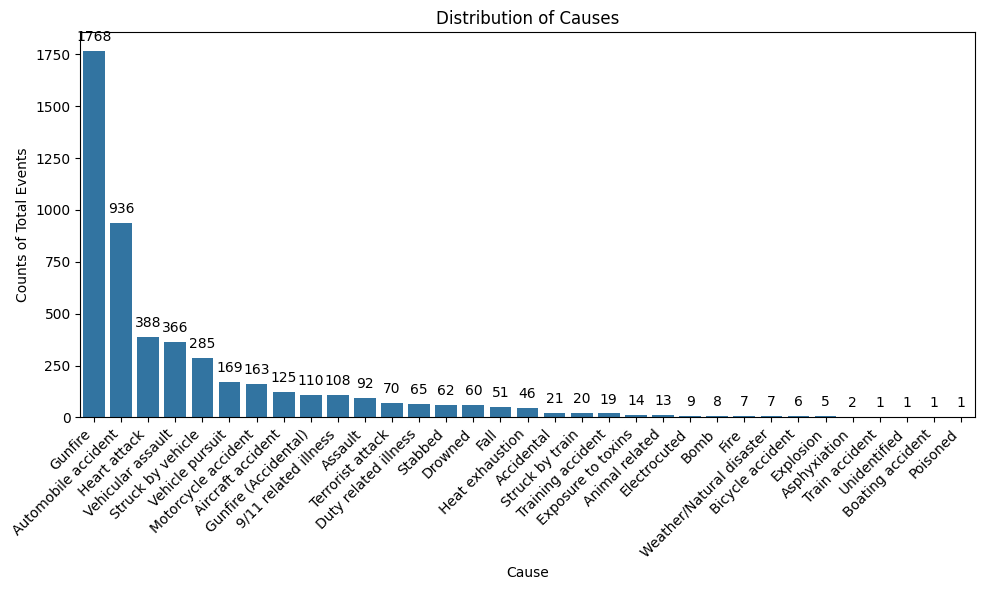

In [ ]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=cause_counts.index, y=cause_counts.values)
plt.xlabel("Cause")
plt.ylabel("Counts of Total Events")
plt.title("Distribution of Causes")
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


### Top 10 States with most Incident Count

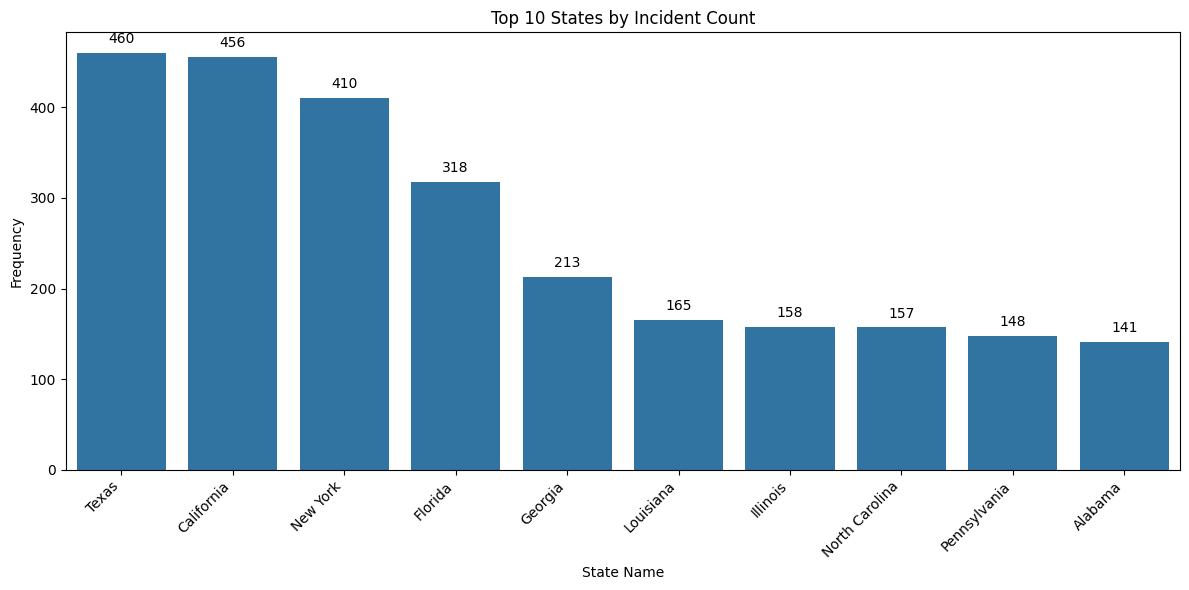

In [ ]:
state_counts = data['state_name'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel("State Name")
plt.ylabel("Frequency")
plt.title("Top 10 States by Incident Count")
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Extract day and month
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

In [ ]:
data['day'] = data['day'].astype(float)
data['month'] = data['month'].astype(float)
data['year'] = data['year'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Index        4999 non-null   int64         
 1   person       4999 non-null   object        
 2   dept         4999 non-null   object        
 3   eow          4999 non-null   object        
 4   cause        4999 non-null   object        
 5   cause_short  4999 non-null   object        
 6   date         4999 non-null   datetime64[ns]
 7   year         4999 non-null   float64       
 8   canine       4999 non-null   bool          
 9   dept_name    4999 non-null   object        
 10  state        4999 non-null   object        
 11  description  4999 non-null   object        
 12  latitude     4999 non-null   float64       
 13  longitude    4999 non-null   float64       
 14  state_name   4999 non-null   object        
 15  day          4999 non-null   float64       
 16  month 

In [ ]:
data['is_weekend'] = data['date'].dt.dayofweek >= 5

In [ ]:
data.head(10)

,Index,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state,description,latitude,longitude,state_name,day,month,is_weekend
0,1,K9 Roscoe,"Phoenix Police Department, AZ","EOW: Friday, July 13, 1984",Cause of Death: Struck by vehicle,Struck by vehicle,1984-07-13,1984.0,True,Phoenix Police Department,AZ,Phoenix,33.448143,-112.096962,Arizona,13.0,7.0,False
1,2,"Police Officer Roy L. Leon, Jr.","Cotton Plant Police Department, AR","EOW: Friday, July 13, 1984",Cause of Death: Gunfire,Gunfire,1984-07-13,1984.0,False,Cotton Plant Police Department,AR,Little Rock,34.746613,-92.288986,Arkansas,13.0,7.0,False
2,3,Officer Stanley D. Pounds,"Portland Police Bureau, OR","EOW: Wednesday, July 18, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-18,1984.0,False,Portland Police Bureau,OR,Salem,44.938461,-123.030403,Oregon,18.0,7.0,False
3,4,"Enforcement Agent Ernest Joseph Gray, Jr.","Pennsylvania Public Utility Commission, PA","EOW: Friday, July 20, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-20,1984.0,False,Pennsylvania Public Utility Commission,PA,Harrisburg,40.264378,-76.883598,Pennsylvania,20.0,7.0,False
4,5,"Police Officer James W. Carozza, Jr.","Greenburgh Police Department, NY","EOW: Friday, July 20, 1984",Cause of Death: Vehicle pursuit,Vehicle pursuit,1984-07-20,1984.0,False,Greenburgh Police Department,NY,Albany,42.652843,-73.757874,New York,20.0,7.0,False
5,6,Patrolman Cleo J. Sheely,"Newton Falls Police Department, OH","EOW: Saturday, July 21, 1984",Cause of Death: Heart attack,Heart attack,1984-07-21,1984.0,False,Newton Falls Police Department,OH,Columbus,39.961346,-82.999069,Ohio,21.0,7.0,True
6,7,Deputy Sheriff Thomas E. Bryant,"Wood County Sheriff's Office, OH","EOW: Monday, July 23, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-23,1984.0,False,Wood County Sheriff's Office,OH,Columbus,39.961346,-82.999069,Ohio,23.0,7.0,False
7,8,Reserve Officer James Charles Taylor,"Dallas Police Department, TX","EOW: Tuesday, July 24, 1984",Cause of Death: Aircraft accident,Aircraft accident,1984-07-24,1984.0,False,Dallas Police Department,TX,Austin,30.274670,-97.740349,Texas,24.0,7.0,False
8,9,Lieutenant Robert L. Cormier,"Dallas Police Department, TX","EOW: Tuesday, July 24, 1984",Cause of Death: Aircraft accident,Aircraft accident,1984-07-24,1984.0,False,Dallas Police Department,TX,Austin,30.274670,-97.740349,Texas,24.0,7.0,False
9,10,Sergeant Ruben Almanza,"Corpus Christi Police Department, TX","EOW: Friday, July 27, 1984",Cause of Death: Gunfire,Gunfire,1984-07-27,1984.0,False,Corpus Christi Police Department,TX,Austin,30.274670,-97.740349,Texas,27.0,7.0,False


In [ ]:
top_10_most_deaths_date = data['date'].value_counts().nlargest(10)
top_10_most_deaths_date

,count
date,
2001-09-11,70
1988-10-24,5
2006-09-28,5
2004-06-17,5
2002-01-08,5
2005-10-03,4
1994-10-11,4
2011-08-01,4
2007-12-19,4


<ipython-input-25-0f3e1a852d99>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-25-0f3e1a852d99>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-25-0f3e1a852d99>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-25-0f3e1a852d99>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


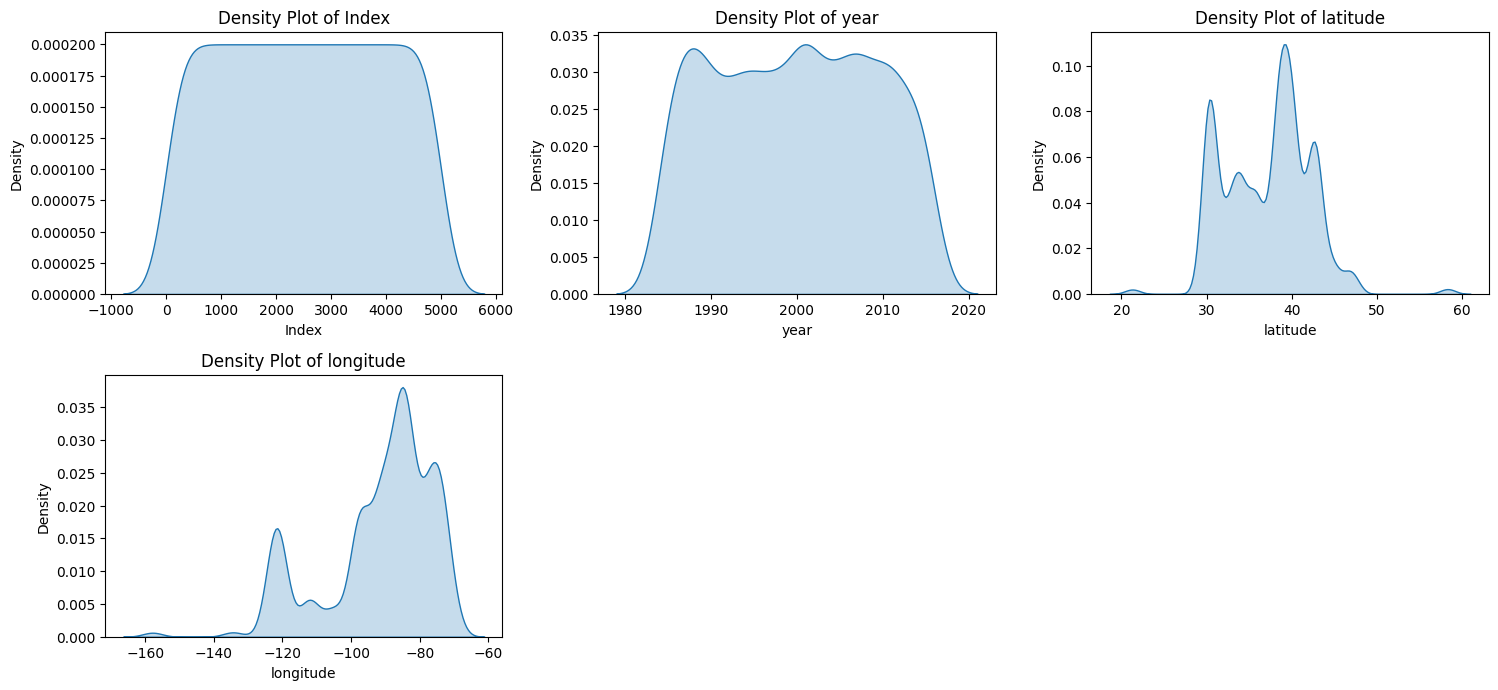

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

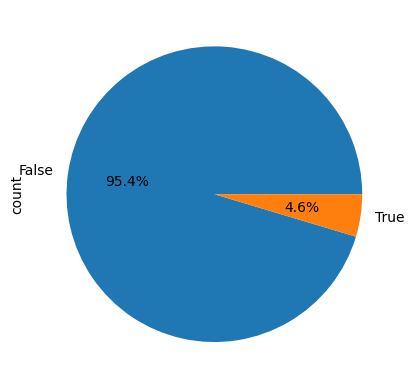

In [ ]:
data["canine"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

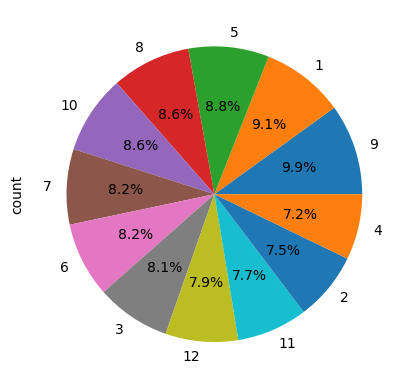

In [ ]:
data["month"].value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
import plotly.express as px
fig = px.scatter_geo(data, lat='latitude', lon='longitude',
                     hover_name="state_name", # Customize hover information
                     color="cause_short", # Color points by cause
                     locationmode='USA-states',
                     scope="usa",
                     title="US Shooting Incidents Map")
fig.show()

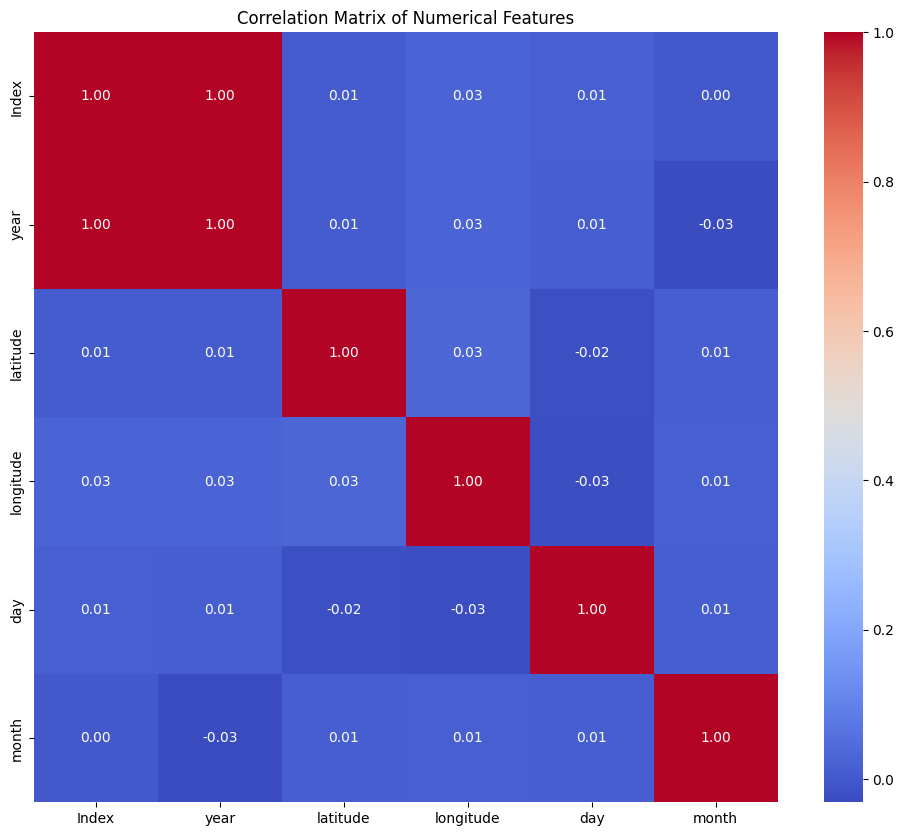

In [ ]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
numerical_features = ['latitude', 'longitude', 'day', 'month', 'year']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in numerical_features:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}:\n{outliers[[col]]}\n")

from scipy import stats
z = np.abs(stats.zscore(data[numerical_features]))
print(np.where(z > 3))


Outliers in latitude:
       latitude
104   21.307442
142   58.301598
333   58.301598
375   58.301598
490   21.307442
547   21.307442
833   58.301598
983   21.307442
1053  21.307442
1168  21.307442
1228  58.301598
1257  58.301598
1620  58.301598
1621  58.301598
1756  21.307442
1757  21.307442
1931  58.301598
1952  58.301598
1996  21.307442
2118  58.301598
2226  58.301598
2309  58.301598
2348  21.307442
2385  21.307442
2611  21.307442
2633  58.301598
2642  58.301598
2775  58.301598
2915  58.301598
2954  21.307442
3021  21.307442
3082  58.301598
3198  21.307442
3540  21.307442
3568  21.307442
3634  21.307442
4151  58.301598
4152  58.301598
4331  21.307442
4386  21.307442
4439  21.307442
4541  58.301598
4546  58.301598
4686  58.301598
4687  58.301598
4808  21.307442

Outliers in longitude:
       longitude
2    -123.030403
56   -122.905014
60   -122.905014
68   -123.030403
69   -123.030403
...          ...
4854 -122.905014
4874 -122.905014
4892 -122.905014
4942 -123.030403
4957 -122.90501

In [ ]:
from sklearn.model_selection import KFold
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

dummy_encode_cols = []
label_encode_cols = []
freq_encode_cols = []
target_encode_cols = []

for col in categorical_cols:
    num_unique = data[col].nunique()

    if num_unique < 5:
        dummy_encode_cols.append(col)  # One-Hot Encoding
    elif num_unique <= 20:
        label_encode_cols.append(col)  # Label Encoding
    elif num_unique <= 50:
        freq_encode_cols.append(col)  # Frequency Encoding
    else:
        target_encode_cols.append(col)  # Target Encoding

print("Dummy Encoding:", dummy_encode_cols)
print("Label Encoding:", label_encode_cols)
print("Frequency Encoding:", freq_encode_cols)
print("Target Encoding:", target_encode_cols)

Dummy Encoding: []
Label Encoding: []
Frequency Encoding: ['cause', 'cause_short', 'state', 'description', 'state_name']
Target Encoding: ['person', 'dept', 'eow', 'dept_name']


In [ ]:
data.head()

,Index,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state,description,latitude,longitude,state_name,day,month
0,1,K9 Roscoe,"Phoenix Police Department, AZ","EOW: Friday, July 13, 1984",Cause of Death: Struck by vehicle,Struck by vehicle,1984-07-13,1984.0,True,Phoenix Police Department,AZ,Phoenix,33.448143,-112.096962,Arizona,13.0,7.0
1,2,"Police Officer Roy L. Leon, Jr.","Cotton Plant Police Department, AR","EOW: Friday, July 13, 1984",Cause of Death: Gunfire,Gunfire,1984-07-13,1984.0,False,Cotton Plant Police Department,AR,Little Rock,34.746613,-92.288986,Arkansas,13.0,7.0
2,3,Officer Stanley D. Pounds,"Portland Police Bureau, OR","EOW: Wednesday, July 18, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-18,1984.0,False,Portland Police Bureau,OR,Salem,44.938461,-123.030403,Oregon,18.0,7.0
3,4,"Enforcement Agent Ernest Joseph Gray, Jr.","Pennsylvania Public Utility Commission, PA","EOW: Friday, July 20, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-20,1984.0,False,Pennsylvania Public Utility Commission,PA,Harrisburg,40.264378,-76.883598,Pennsylvania,20.0,7.0
4,5,"Police Officer James W. Carozza, Jr.","Greenburgh Police Department, NY","EOW: Friday, July 20, 1984",Cause of Death: Vehicle pursuit,Vehicle pursuit,1984-07-20,1984.0,False,Greenburgh Police Department,NY,Albany,42.652843,-73.757874,New York,20.0,7.0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'state_name' column
enc.fit(data[['state_name']])

# Transform the 'state_name' column into one-hot encoded features
onehotlabels = enc.transform(data[['state_name']]).toarray()

# Create a new DataFrame with the one-hot encoded features
onehot_df = pd.DataFrame(onehotlabels, columns=enc.get_feature_names_out(['state_name']))

KeyError: "None of [Index(['state_name'], dtype='object')] are in the [columns]"

In [ ]:
# Concatenate the one-hot encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data, onehot_df], axis=1)

# Optionally, drop the original 'state_name' column
data_encoded = data.drop('state_name', axis=1)

KeyError: "['state_name'] not found in axis"

In [ ]:
data_encoded.head()

,Index,person,dept,eow,cause,cause_short,date,year,canine,dept_name,...,state_name_South Dakota,state_name_Tennessee,state_name_Texas,state_name_Utah,state_name_Vermont,state_name_Virginia,state_name_Washington,state_name_West Virginia,state_name_Wisconsin,state_name_Wyoming
0,1,K9 Roscoe,"Phoenix Police Department, AZ","EOW: Friday, July 13, 1984",Cause of Death: Struck by vehicle,Struck by vehicle,1984-07-13,1984.0,True,Phoenix Police Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"Police Officer Roy L. Leon, Jr.","Cotton Plant Police Department, AR","EOW: Friday, July 13, 1984",Cause of Death: Gunfire,Gunfire,1984-07-13,1984.0,False,Cotton Plant Police Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Officer Stanley D. Pounds,"Portland Police Bureau, OR","EOW: Wednesday, July 18, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-18,1984.0,False,Portland Police Bureau,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,"Enforcement Agent Ernest Joseph Gray, Jr.","Pennsylvania Public Utility Commission, PA","EOW: Friday, July 20, 1984",Cause of Death: Automobile accident,Automobile accident,1984-07-20,1984.0,False,Pennsylvania Public Utility Commission,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,"Police Officer James W. Carozza, Jr.","Greenburgh Police Department, NY","EOW: Friday, July 20, 1984",Cause of Death: Vehicle pursuit,Vehicle pursuit,1984-07-20,1984.0,False,Greenburgh Police Department,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
columns_to_drop = ['person', 'dept', 'eow', 'cause', 'state_name', 'state']
data_encoded = data_encoded.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
data_encoded = data_encoded.drop('description', axis=1)

In [ ]:
data_encoded = data_encoded.drop('dept_name', axis=1)

In [ ]:
data_encoded = data_encoded.drop('cause_short', axis=1)

In [ ]:
data_encoded = data_encoded.drop('date', axis=1)

In [ ]:
data_encoded = data_encoded.drop('Index', axis=1)

In [ ]:
scaler = StandardScaler()
# Fit and transform the 'latitude' and 'longitude' columns
data_encoded[['latitude', 'longitude']] = scaler.fit_transform(data_encoded[['latitude', 'longitude']])

In [ ]:
data_encoded.head()

,Index,year,canine,latitude,longitude,day,month,is_weekend,state_name_Alabama,state_name_Alaska,...,state_name_South Dakota,state_name_Tennessee,state_name_Texas,state_name_Utah,state_name_Vermont,state_name_Virginia,state_name_Washington,state_name_West Virginia,state_name_Wisconsin,state_name_Wyoming
0,1,1984.0,True,-0.755382,-1.299717,13.0,7.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1984.0,False,-0.492220,-0.039998,13.0,7.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1984.0,False,1.573370,-1.995046,18.0,7.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1984.0,False,0.626070,0.939731,20.0,7.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1984.0,False,1.110142,1.138516,20.0,7.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_encoded.head()

,year,canine,latitude,longitude,day,month,is_weekend,state_name_Alabama,state_name_Alaska,state_name_Arizona,...,state_name_South Dakota,state_name_Tennessee,state_name_Texas,state_name_Utah,state_name_Vermont,state_name_Virginia,state_name_Washington,state_name_West Virginia,state_name_Wisconsin,state_name_Wyoming
0,1984.0,True,-0.755382,-1.299717,13.0,7.0,False,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1984.0,False,-0.492220,-0.039998,13.0,7.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1984.0,False,1.573370,-1.995046,18.0,7.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1984.0,False,0.626070,0.939731,20.0,7.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1984.0,False,1.110142,1.138516,20.0,7.0,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encode categorical target
le = LabelEncoder()
data['cause_short'] = le.fit_transform(data['cause_short'])

# Select features
X = data_encoded
y = data['cause_short']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))

RF Accuracy: 0.33666666666666667
SVM Accuracy: 0.3606666666666667


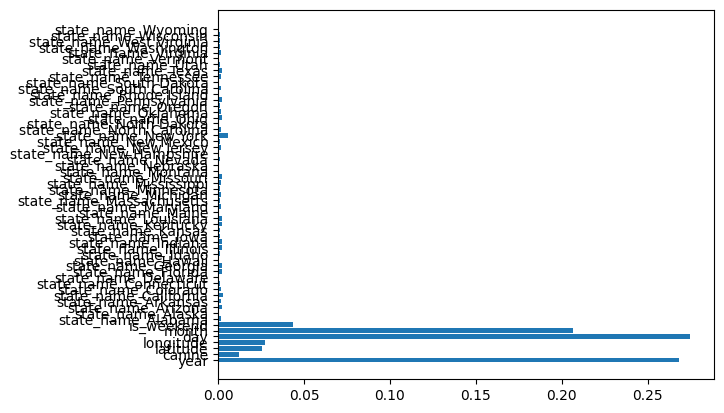

In [ ]:
features = X.columns
importances = rf.feature_importances_
plt.barh(features, importances)
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
estimators = [
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]

# Stacking classifier
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning:

Number of classes in training fold (30) does not match total number of classes (31). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning:

Number of classes in training fold (30) does not match total number of classes (31). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/u

Stacking Accuracy: 0.3893333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



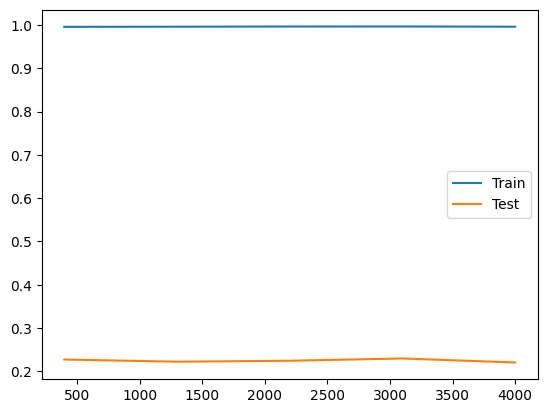

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), X, y, cv=5
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.legend()
plt.show()

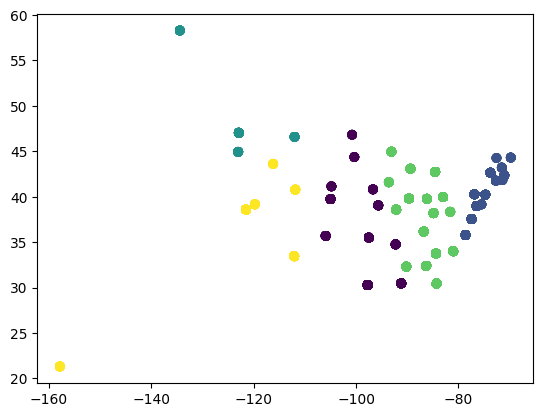

In [ ]:
from sklearn.cluster import KMeans

# Cluster geographical data
coords = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(coords)

# Visualize clusters
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'])
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# Detect anomalies in feature space
clf = IsolationForest(contamination=0.05)
data["anomaly"] = clf.fit_predict(data[["latitude", "longitude", "year"]])

# Filter anomalies
anomalies = data[data["anomaly"] == -1]

In [ ]:
from sklearn.cluster import DBSCAN

# Detect spatial outliers
dbscan = DBSCAN(eps=1.0, min_samples=5)
data['anomaly'] = dbscan.fit_predict(coords)

# Anomalies marked as -1
print(data[data['anomaly'] == -1])

Empty DataFrame
Columns: [Index, person, dept, eow, cause, cause_short, date, year, canine, dept_name, state, description, latitude, longitude, day, month, is_weekend, state_name_Alabama, state_name_Alaska, state_name_Arizona, state_name_Arkansas, state_name_California, state_name_Colorado, state_name_Connecticut, state_name_Delaware, state_name_Florida, state_name_Georgia, state_name_Hawaii, state_name_Idaho, state_name_Illinois, state_name_Indiana, state_name_Iowa, state_name_Kansas, state_name_Kentucky, state_name_Louisiana, state_name_Maine, state_name_Maryland, state_name_Massachusetts, state_name_Michigan, state_name_Minnesota, state_name_Mississippi, state_name_Missouri, state_name_Montana, state_name_Nebraska, state_name_Nevada, state_name_New Hampshire, state_name_New Jersey, state_name_New Mexico, state_name_New York, state_name_North Carolina, state_name_North Dakota, state_name_Ohio, state_name_Oklahoma, state_name_Oregon, state_name_Pennsylvania, state_name_Rhode Island, s

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
data['gmm_cluster'] = gmm.fit_predict(coords)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Autoencoder for anomaly detection
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2)

# Get reconstructions
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
data['anomaly_score'] = mse

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 37376.6016 - val_loss: 37360.0820
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 37349.1367 - val_loss: 37360.0781
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 37349.4180 - val_loss: 37360.0781
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37340.5430 - val_loss: 37360.0781
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 37334.0469 - val_loss: 37360.0781
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 37332.3594 - val_loss: 37360.0781
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 37342.9688 - val_loss: 37360.0703
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 37345.6328 - val_loss: 37360.0703
Epoch 9/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 37329.3750 - val_loss: 37360.0703
Epoch 10/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37341.5938 - val_loss: 37360.0703
Epoch 11/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 37339.1094 - val_